<a href="https://colab.research.google.com/github/agusrusmawan/ITTS-DS/blob/main/ITTS_DS_(Final_Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Agus Rusmawan
Email : rusmawan@gmail.com
## Final Assignment : Car_Sales_Project
### Source : https://www.kaggle.com
#Pertanyaan
1. Penjualan merk mobil terbanyak
2. Penjualan merk mobil tersedikit
3. Penjualan Merk Honda terbanyak
4. Penjualan Merk Nissan terbanyak
5. Bulan penjualan terbanyak
6. Visualisasi Gambar


In [213]:
#Menyiapkan semua library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
#Memuat/Loading Data
df =pd.read_csv("car_sales_data.csv")

In [215]:
#Menampilkan 5 baris pertama dari dataframe
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [216]:
#Mengecek Typedata yang digunakan
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [217]:
#Dari dataframe di atas, terlihat bahwa kolom Date typedatanya adalah object (string), seharusnya adalah datetime. Kita akan perbaiki kesalahan tersebut
df['Date'] = pd.to_datetime(df['Date'])

In [218]:
#Mengecek hasil perubahan typedata
df.dtypes

Date                 datetime64[ns]
Salesperson                  object
Customer Name                object
Car Make                     object
Car Model                    object
Car Year                      int64
Sale Price                    int64
Commission Rate             float64
Commission Earned           float64
dtype: object

In [219]:
#Dari data di atas, terlihat bahwa kolom Date typedatanya telah berubah menjadi datetime
#Memeriksa duplikasi data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [220]:
#Memeriksa parameter statistik dari kolom numerik
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [221]:
#Hasil di atas, menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik
#Menghapus kolom yang tidak digunakan
#Jika melihat dari daftar pertanyaan sebelumnya, maka ada beberapa kolom yang bisa dihilangkan untuk lebih menyederhanakan data yaitu kolom "Salesperson", "Customer Name", "Car Year", "Commision Rate" dan "Commision Earned"
del df["Salesperson"]
del df["Customer Name"]
del df["Car Year"]
del df["Commission Rate"]
del df["Commission Earned"]


In [222]:
#Melakukan pengecekan kolom yang telah dihapus
df.head()

,Date,Car Make,Car Model,Sale Price
0,2022-08-01,Nissan,Altima,15983
1,2023-03-15,Nissan,F-150,38474
2,2023-04-29,Ford,Civic,33340
3,2022-09-04,Ford,Altima,41937
4,2022-06-16,Honda,Silverado,20256


In [223]:
#Dari data di atas, terlihat bahwa kolom yang tidak dibutuhkan sudah dihapus dari dataframe
#mencari merk mobil dengan penjualan terbanyak
mobil_terbanyak = df['Car Make'].value_counts().idxmax()
print("Mobil dengan merk yang paling banyak terjual adalah:", mobil_terbanyak)

Mobil dengan merk yang paling banyak terjual adalah: Honda


In [224]:
#Mencari merk mobil dengan penjualan tersedikit
mobil_tersedikit = df['Car Make'].value_counts().idxmin()
print("Mobil dengan merk yang paling sedikit terjual adalah:", mobil_tersedikit)

Mobil dengan merk yang paling sedikit terjual adalah: Nissan


In [225]:
#Mencari tipe Honda dengan penjualan terbanyak
honda_terbanyak = df[df['Car Make'] == 'Honda'].value_counts().idxmax()
print("Mobil Honda dengan tipe yang paling banyak terjual adalah:", honda_terbanyak)

Mobil Honda dengan tipe yang paling banyak terjual adalah: (Timestamp('2022-10-08 00:00:00'), 'Honda', 'Altima', 28602)


In [226]:
#Mencari tipe Nissan dengan penjualan terbanyak
Nissan_terbanyak = df[df['Car Make'] == 'Nissan'].value_counts().idxmax()
print("Mobil Nissan dengan tipe yang paling banyak terjual adalah:", Nissan_terbanyak)

Mobil Nissan dengan tipe yang paling banyak terjual adalah: (Timestamp('2022-05-18 00:00:00'), 'Nissan', 'F-150', 24190)


In [227]:
#extracting month dari Date
df['Month'] =df['Date'].dt.month

In [228]:
#extracting year dari Date
df['Year'] =df['Date'].dt.year

In [229]:
# Bulan Penjualan Terbanyak

df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby(['Month', 'Year'])['Sale Price'].sum()
max_sales_month = monthly_sales.idxmax()
print(f"Bulan dengan penjualan terbanyak adalah {max_sales_month}")

Bulan dengan penjualan terbanyak adalah (12, 2022)


In [230]:
## memeriksa total penjualan per bulan
monthly_sales_2022_2023 = df.groupby(['Year', 'Month'])['Sale Price'].sum()
sort = monthly_sales_2022_2023.groupby('Year').apply(lambda x: x.sort_values(ascending=False))
sort

Year  Year  Month
2022  2022  12       6385067556
            10       6378840202
            8        6354441192
            5        6354253868
            7        6348409539
            6        6162247177
            9        6138540711
            11       6129814538
2023  2023  3        6347385901
            1        6346868533
            4        6128938587
            2        5749952581
            5         205686470
Name: Sale Price, dtype: int64

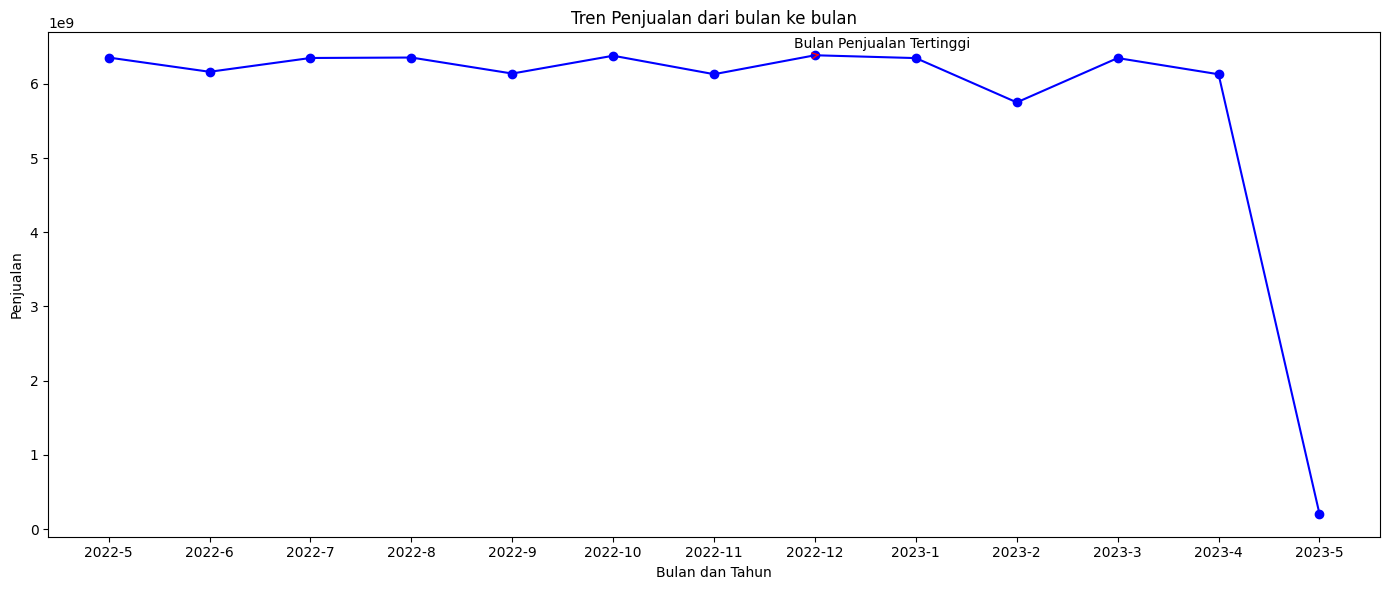

In [231]:
#Visualisasi Data
months_years = [(f"{year}-{month}", monthly_sales_2022_2023[(year, month)]) for year, month in sorted(monthly_sales_2022_2023.keys())]
plt.figure(figsize=(14, 6))
plt.plot(*zip(*months_years), marker='o', linestyle='-', color='blue')
plt.title('Tren Penjualan dari bulan ke bulan')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Penjualan')
plt.xticks(rotation=0)

# Highlighting December as the highest sales month
max_sales_month = max(months_years, key=lambda x: x[1])
plt.annotate( 'Bulan Penjualan Tertinggi',xy=max_sales_month, xytext=(-15, 5), textcoords='offset points',
             arrowprops=dict(arrowstyle='<-', color='red'))

plt.tight_layout()
plt.show()